<a href="https://colab.research.google.com/github/ruman-shaikh/NLP_Project_Grp_1/blob/Ruman/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Stuff
i.e. mounting to drive, checking directory, import statements, etc.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/Shareddrives/NMA_DL_Dolma_1/Datasets/Sentiment140/EMB
%pwd
%ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/Shareddrives/NMA_DL_Dolma_1/Datasets/Sentiment140/EMB_CPY
test_embeddings.pkl  train_embeddings.pkl  val_embeddings.pkl


In [ ]:
#All the import statements go here.
import pickle

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, IncrementalPCA

import matplotlib.pyplot as plt
import matplotlib

# Loading the data

In [ ]:
def load_emb(filename):
  with open(filename, "rb") as fIn:
    stored_data = pickle.load(fIn)
    stored_sentences = stored_data['sentences']
    stored_embeddings = stored_data['embeddings']
    stored_labels = stored_data['labels']
  
  return stored_sentences, stored_embeddings, stored_labels

In [ ]:
print("List of embedding:")
%ls

List of embedding:
test_embeddings.pkl  train_embeddings.pkl  val_embeddings.pkl


In [ ]:
train_sentences, train_embs, train_labels = load_emb("train_embeddings.pkl")
print(len(train_sentences), train_embs.shape, len(train_labels))

960000 (960000, 384) 960000


In [ ]:
test_sentences, test_embs, test_labels = load_emb("test_embeddings.pkl")
print(len(test_sentences), test_embs.shape, len(test_labels))

320000 (320000, 384) 320000


In [ ]:
val_sentences, val_embs, val_labels = load_emb("val_embeddings.pkl")
print(len(val_sentences), val_embs.shape, len(val_labels))

320000 (320000, 384) 320000


In [ ]:
all_sentences = train_sentences + test_sentences + val_sentences
all_embs = np.concatenate((train_embs, test_embs, val_embs), axis=0)
all_labels = train_labels + test_labels + val_labels
print(len(all_sentences), all_embs.shape, len(all_labels))

1600000 (1600000, 384) 1600000


# PCA

In [ ]:
#run IncrementalPCA on x in batches of 100,000. 
n_components = 2
ipca = IncrementalPCA(n_components = n_components, batch_size = 100000)
X_ipca = ipca.fit_transform(all_embs)

In [ ]:
X_ipca.shape      #shape should be [n_samples, n_components]

(1600000, 2)

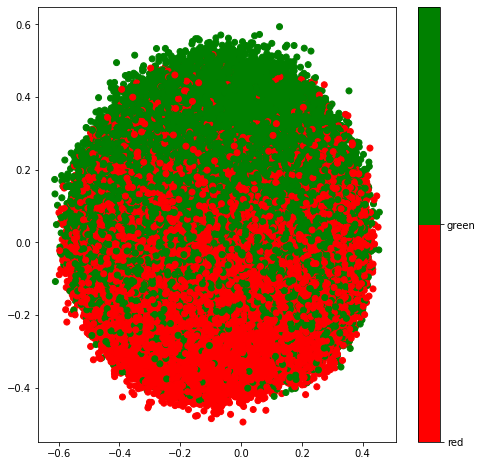

In [ ]:
#SCATTERPLOT with 2 principle componenets

data = X_ipca
x, y = data.T
label = all_labels
colors = ['red','green']      #red -> negative, green -> positive

fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

# Visulization of Adversarial Examples

From the above plot we can infer that:
 - Sentiment is expressed as the second Principle Component (Y-axis)
 - Posotive tweets mostly have a higher than 0
 2 y-component value
 - Negative tweets mostly have a lower than -0.2 y-component value

In [ ]:
from sklearn.linear_model import LogisticRegression

X = X_ipca
y = all_labels
clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)

0.62695375

In [ ]:
n_samples = X_ipca.shape[0]

neg_adv_sent = []     # Labelled as negative but PCA marks as positive
neg_adv_comp = []
pos_adv_sent = []     # Labelled as positive but PCA marks as negative
pos_adv_comp = []

for i in range(n_samples):
  if all_labels[i] == 0 and X_ipca[i][1] > 0.2:
    neg_adv_sent.append(all_sentences[i])
    neg_adv_comp.append(X_ipca[i])
  if all_labels[i] == 4 and X_ipca[i][1] < -0.2:
    pos_adv_sent.append(all_sentences[i])
    pos_adv_comp.append(X_ipca[i])

In [ ]:
len(neg_adv_sent), len(pos_adv_sent)

(28150, 22860)

In [ ]:
df = pd.DataFrame(data=neg_adv_sent)
df

,0
0,"me 10 - 630, andrew 8 - 4. no idea about the r..."
1,"yeah,not as long as 3 weeks more so just one..."
2,- ou! i want one! but i have to wait
3,emma told me about her haha :^) do u have a y...
4,haven't tweeted in 2 days. for shame. one of ...
...,...
28145,feeling a bit betrayed by friends ah im sure ...
28146,doing my make up for today! lot of exams ahh...
28147,i need it too!
28148,will be at milne til may 13th!


In [ ]:
df = pd.DataFrame(data=pos_adv_sent)
df

,0
0,going to bed night everyone
1,si senoir... lol ok i will ask my mom. um. so...
2,chocolat tastes good thought
3,mind over muscle
4,"woohoo, feel like an arseee... feels baddd! on..."
...,...
22855,had coffee before. the birds wake me up early.
22856,reading &quot;twilight&quot;...all day...
22857,shower...ride to buggy...
22858,i'm tired ! like to eat some nuggets


In [ ]:
((28150 + 22860) / 1600000) * 100

3.188125

# End of Necessary Code
Below is experimentation with IPCA and plotting it in three dimensions and ventures into TSNE. Nothing should be worth retaining but I am hesitant to independently delete it. 

In [ ]:
#run IncrementalPCA on x in batches of 100,000 in three dimensions. Takes a while but works.
#Wasn't this done earlier? Why are we doing it again here?
n_components = 3
ipca = IncrementalPCA(n_components = n_components, batch_size = 100000)
X_ipca = ipca.fit_transform(x)

In [ ]:
print(X_ipca.shape)

(960000, 3)


In [ ]:

df = pd.DataFrame(X_ipca, columns =['x', 'y', 'z'])
df['labels'] = stored_labels
df.head()

,x,y,z,labels
0,-0.040449,-0.003127,-0.332235,0
1,0.059301,-0.164488,-0.005894,0
2,0.114071,-0.095177,-0.003664,0
3,0.054325,0.003774,0.151004,4
4,0.188658,-0.042761,-0.158643,4


In [ ]:


fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='labels')
fig.show()

In [ ]:
!pip install opentsne
!pip install fitsne
from openTSNE import TSNE

In [ ]:
X = stored_embeddings
tsne_reduction = TSNE(n_components = 2, learning_rate = "auto", initialization = 'random').fit(X) 

KeyboardInterrupt: ignored

In [ ]:
data = X_ipca

X, Y, Z = data[:,0], data[:,1], data[:,2]
label = stored_labels
colors = ['red','green']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, Z, color='white', edgecolors='grey', alpha=0.5)
ax.scatter(X, Y, Z, c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)